# **demostración visual y práctica del procesamineot digital de señales**

In [70]:
import numpy as np 
import matplotlib.pyplot as plt 
from IPython.display import Audio
import scipy.signal as signal 

In [71]:
#plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [12, 6]

In [72]:
def crear_señal_musical(): 
    t = np.linspace(0, 3, 12000)
    frecuencias = [262, 330, 392]
    señal = np.zeros_like(t)
    for f in frecuencias :
        señal += np.sin(2*np.pi * f * t) 
    return t, señal/ len(frecuencias)
     


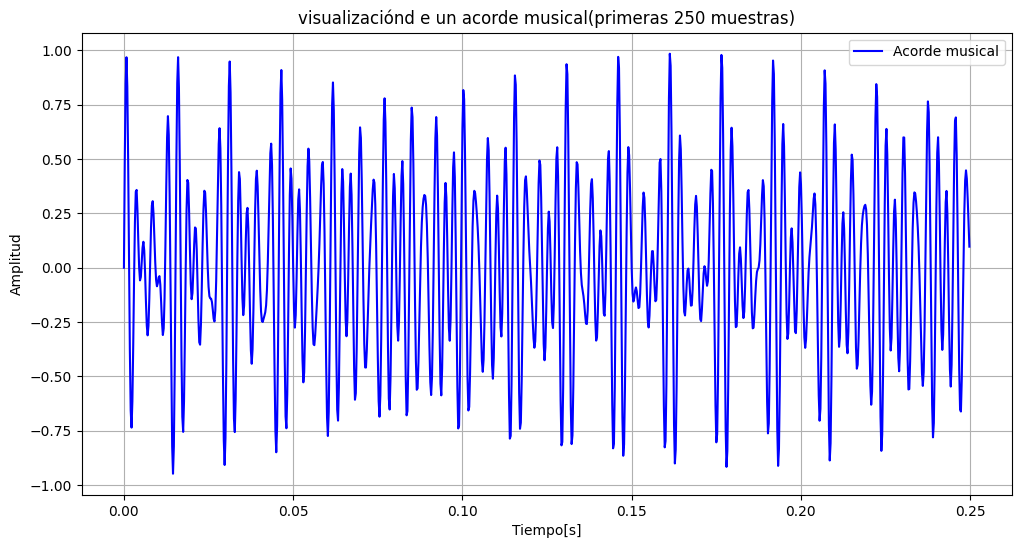

In [73]:
t, señal_musical = crear_señal_musical()

plt.figure(figsize=(12,6))
plt.plot(t[:1000],señal_musical[:1000], 'b-', label='Acorde musical')
plt.title('visualizaciónd e un acorde musical(primeras 250 muestras)')
plt.xlabel('Tiempo[s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
Audio(señal_musical, rate = 4000)

In [75]:
def anadir_ruido_y_filtrar (señal, nivel_ruido=0.5):
    ruido = np.random.normal(0, nivel_ruido, señal.shape)
    señal_con_ruido = señal + ruido

    #Aplicar un filto
    b, a = signal.butter(4, 0.1)
    señal_filtrada =signal.filtfilt(b, a, señal_con_ruido)
    
    return señal_con_ruido, señal_filtrada



In [76]:
senal_ruidosa, senal_limpia = anadir_ruido_y_filtrar(señal_musical)


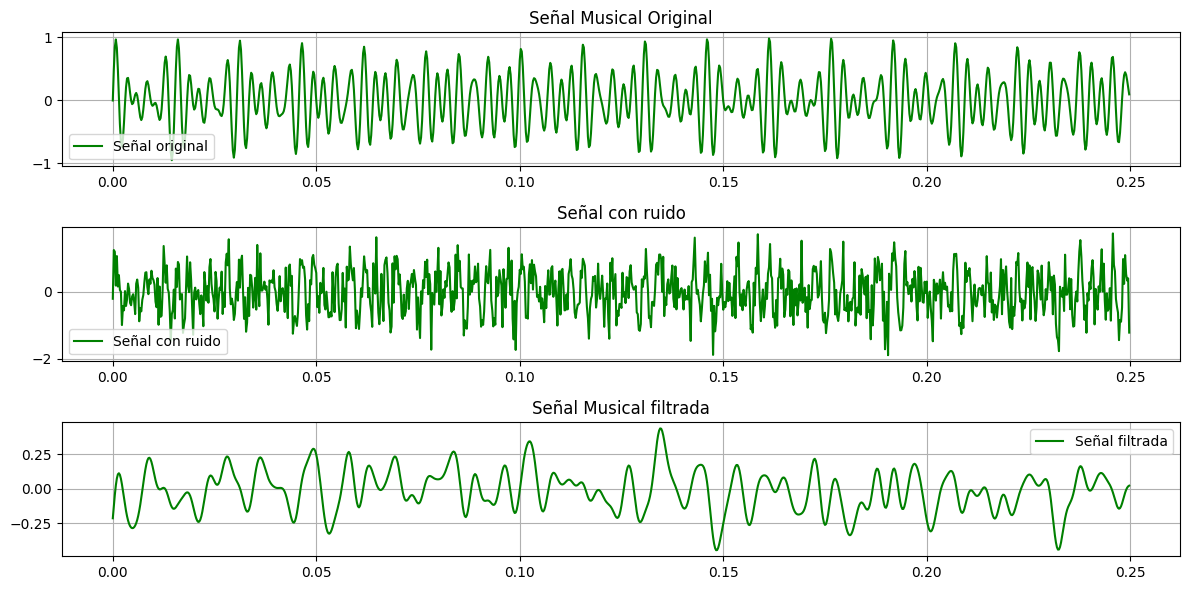

In [77]:
plt.figure()

plt.subplot(3,1,1)
plt.plot(t[:1000], señal_musical[:1000], 'g-', label = 'Señal original')
plt.legend()
plt.title('Señal Musical Original')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t[:1000], senal_ruidosa[:1000], 'g-', label = 'Señal con ruido')
plt.legend()
plt.title('Señal con ruido')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t[:1000], senal_limpia[:1000], 'g-', label = 'Señal filtrada')
plt.legend()
plt.title('Señal Musical filtrada')
plt.grid(True)

plt.tight_layout()
plt.show()

In [78]:
Audio(senal_ruidosa, rate = 4000)


In [79]:
Audio(senal_limpia, rate = 4000)

In [80]:
def analizar_frecuecnias(señal, fs = 4000):
    frecuencias =np.fft.fftfreq(len(señal), 1/fs)
    espectro = np.abs(np.fft.fft(señal))

    mascara = frecuencias > 0
    return frecuencias[mascara], espectro[mascara]


In [81]:
freq_orig, esp_orig = analizar_frecuecnias(señal_musical)



In [82]:
freq_ruido, esp_ruido = analizar_frecuecnias(senal_ruidosa)

In [83]:
freq_limpia, esp_limpia = analizar_frecuecnias(senal_limpia)

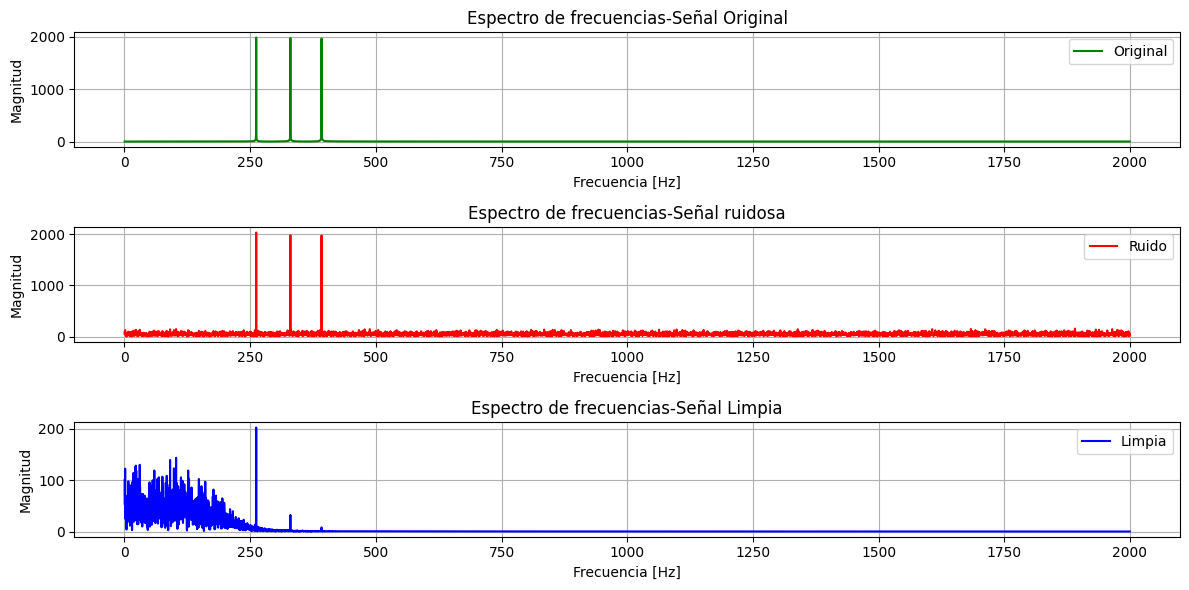

In [85]:
plt.figure()

plt.subplot(3,1,1)
plt.plot(freq_orig, esp_orig, 'g-', label = 'Original')
plt.legend()
plt.title('Espectro de frecuencias-Señal Original')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(freq_ruido, esp_ruido, 'r-', label = 'Ruido')
plt.legend()
plt.title('Espectro de frecuencias-Señal ruidosa')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(freq_limpia, esp_limpia, 'b-', label = 'Limpia')
plt.legend()
plt.title('Espectro de frecuencias-Señal Limpia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)

plt.tight_layout()
plt.show()